### Assignment 7

We will work on ideas from model selection (eg cross validation) and error metrics (eg f1 score).

For real data we will use the `accelerometer` data, which is loaded below.

This is a trinary classification problem in its raw form.

So that everyone can work with the same train/test split I have done that part with a fixed `random_state`. 

The questions start after the data is set up.

In [1]:
import pandas as pd

df = pd.read_csv("accelerometer.csv")
df.head()

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


In [2]:
df["wconfid"].value_counts()  ## the target

1    51000
2    51000
3    51000
Name: wconfid, dtype: int64

In [3]:
y = (df["wconfid"]==1)*2-1 ## Turn 3 class problem into 2 class problem
X = df[[c for c in df.columns if c != "wconfid"]]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7735424836601307

In [5]:
yhat = clf.predict_proba(X_test) ### Probability vector

In [6]:
toy_yhat = yhat[:7]
toy_y_test = y_test[:7]
thetas = [0.3,0.5,0.7,0.9]  ## Thresholds
print(toy_yhat)
print(toy_y_test)

[[0.9975    0.0025   ]
 [0.84      0.16     ]
 [0.4       0.6      ]
 [0.5033373 0.4966627]
 [0.8       0.2      ]
 [0.86      0.14     ]
 [0.58      0.42     ]]
5832      1
126495   -1
45864     1
57123    -1
88065    -1
95550    -1
77280    -1
Name: wconfid, dtype: int64


## Problem 1

You can do this by hand or with code. 

I suggest doing it by hand at least once. 

In the above code we get a short vector of probability predictions `toy_yhat`. 

We also get a short vector of corresponding true classes, `toy_y_test`.

The `thetas` variable contains a list of possible thresholds $\theta$ for turning `toy_yhat` into a vector of $\pm 1$ predictions. 

To be precise, `(toy_yhat > t)*2-1` is a $\pm 1$ prediction vector for each `t`$\in$`thetas`. 

---

For each value of $\theta$ in `thetas`, give the following properties of the resulting vector of $\pm 1$ predictions when the threshold is applied to `toy_yhat`. 

1. The precision
2. The recall
3. The f1 score

Which threshold maximizes the `f1 score`? 

In [32]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

for t in thetas:
    little_yhat = (toy_yhat[:,1]>t)*2-1
    prec = precision_score(toy_y_test,little_yhat)
    rec = recall_score(toy_y_test,little_yhat)
    f1 = f1_score(toy_y_test,little_yhat)
    acc = accuracy_score(toy_y_test,little_yhat)

    print(f"Answer: (t={t}) (precision, recall, f1, acc) = ",round(prec,2),round(rec,2),round(f1,2),round(acc,2))

    TP = ((toy_y_test==1)&(little_yhat==1)).sum()
    FP = ((toy_y_test != 1)&(little_yhat==1)).sum()
    FN = ((toy_y_test==1)&(little_yhat != 1)).sum()
    TN = ((toy_y_test!=1)&(little_yhat != 1)).sum()
    print("TP,FP,FN,TN=",TP,FP,FN,TN)

    prec = TP/(TP+FP)
    rec = TP/(TP+FN)
    f1 = 2/(1/prec+1/rec)
    print("Homemade prec,rec,f1 = ",round(prec,2),round(rec,2),round(f1,2))
    

"""

For the reader:

When there are no positive predictions made
the precision is 0/0, and is therefore not properly defined.

Because f1 score is a function of precision, the f1 score is
also not defined.

That is what causes the chorus of warnings in the output.

This is unlikely to occur on a real dataset, but as this example shows,
it can happen.

"""
pass

Answer: (t=0.3) (precision, recall, f1, acc) =  0.33 0.5 0.4 0.57
TP,FP,FN,TN= 1 2 1 3
Homemade prec,rec,f1 =  0.33 0.5 0.4
Answer: (t=0.5) (precision, recall, f1, acc) =  1.0 0.5 0.67 0.86
TP,FP,FN,TN= 1 0 1 5
Homemade prec,rec,f1 =  1.0 0.5 0.67
Answer: (t=0.7) (precision, recall, f1, acc) =  0.0 0.0 0.0 0.71
TP,FP,FN,TN= 0 0 2 5
Homemade prec,rec,f1 =  nan 0.0 nan
Answer: (t=0.9) (precision, recall, f1, acc) =  0.0 0.0 0.0 0.71
TP,FP,FN,TN= 0 0 2 5
Homemade prec,rec,f1 =  nan 0.0 nan


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/ht/7rqyw9hs3fj63k5lvf08qhdh0000gn/T/ipykernel_41583/1836077983.py:18: RuntimeWarning: invalid value encountered in long_scalars
  prec = TP/(TP+FP)
/var/folders/ht/7rqyw9hs3fj63k5lvf08qhdh0000gn/T/ipykernel_41583/1836077983.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  f1 = 2/(1/prec+1/rec)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/fold

### Problem 2

Consider the learning curves shown below. 

(This code takes some time to run (2 mins?)... You don't need to rerun it as long as you can see the images.)

The code is adapted from the textbook code for Ch 6. 

---

Can you explain what is happening here in terms of your knowledge of learning curves? 

Does this fit the "cartoon" version of the way ideal learning curves are supposed to work? 

Which value for `max_depth` of the random forest would you put in the model you gave to a client? 

What would you say?

What do you think the effect of more data would be in the case of each value for `md`? 

### Problem 2 Solution

Most of these learning curves are similar to the "cartoon" expectation.  That picture shows training and validation accuracy converging after some number of sample points. The number of necessary sample points for convergence increases as the complexity of the model increases. However as model complexity increases, the constant to which the two values converge improves.

This is exactly what we observe below.  Here "max_depth" is governing "model complexity" with deeper trees resulting in more complicated decision policies.

The model we should give to the client is the one with the highest validation accuracy, namely `max_depth=16`.

We might tell the customer that if they can collect significantly more data, then a more complex model will likely perform better.

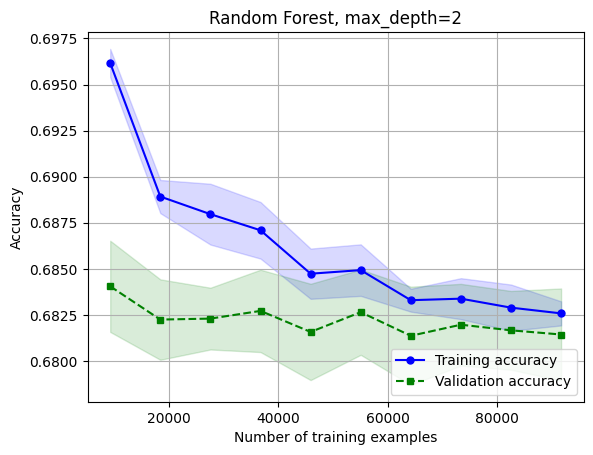

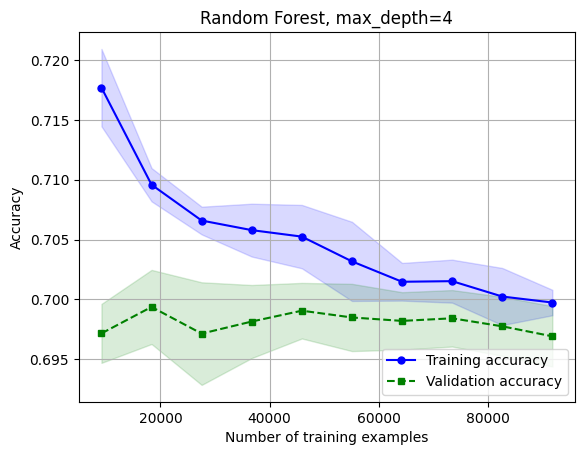

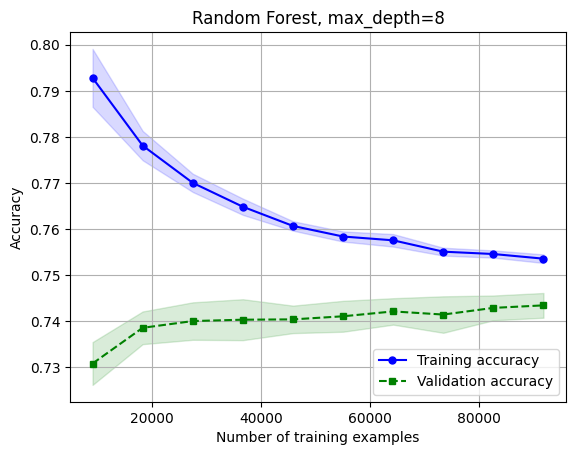

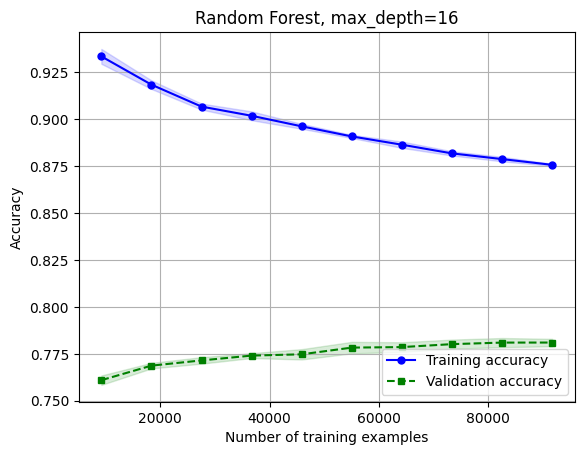

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


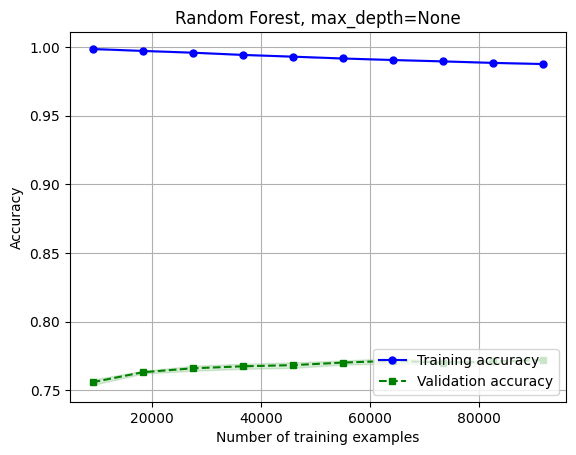

In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
import numpy as np

#clf = LogisticRegression(penalty='l2', random_state=1,solver='lbfgs', max_iter=10000)

for md in [2,4,8,16,None]:
    clf = RandomForestClassifier(max_depth=md,n_jobs=-1) 


    pipe_rf = make_pipeline(StandardScaler(),clf)

    train_sizes, train_scores, test_scores =\
                    learning_curve(estimator=pipe_rf,
                                X=X_train,
                                y=y_train,
                                train_sizes=np.linspace(0.1, 1.0, 10),
                                cv=5,
                                n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean,
            color='blue', marker='o',
            markersize=5, label='Training accuracy')

    plt.fill_between(train_sizes,
                    train_mean + train_std,
                    train_mean - train_std,
                    alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean,
            color='green', linestyle='--',
            marker='s', markersize=5,
            label='Validation accuracy')

    plt.fill_between(train_sizes,
                    test_mean + test_std,
                    test_mean - test_std,
                    alpha=0.15, color='green')

    plt.grid()
    plt.xlabel('Number of training examples')
    plt.ylabel('Accuracy')
    plt.title(f"Random Forest, max_depth={md}")
    plt.legend(loc='lower right')
    plt.show()

### Problem 3

Below is some minimal functional code for plotting a ROC curve.

The data used is from a `RandomForest` model with default parameters.

Improve this graph by adding ROC curves for `RandomForest` with other hyperparameter settings.

For example you might try out all of the values for `max_depth` considered in Problem 2. 

Plot all the curves in the same figure. 

Use the library `roc_auc_score` (from `sklearn.metrics`) to find the hyperparameter settings that give the random forest the best ROC-AUC performance. 

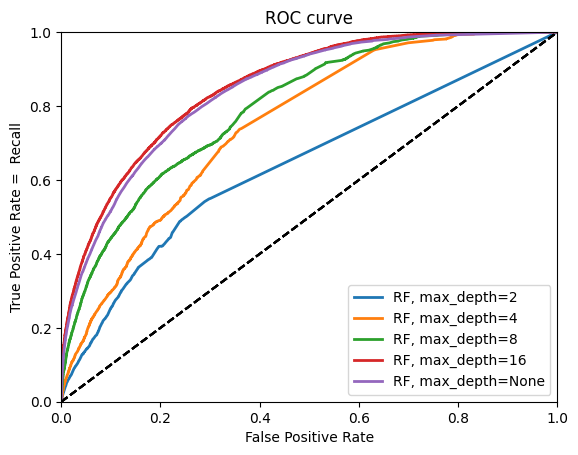

In [33]:
from sklearn.metrics import roc_curve

for md in [2,4,8,16,None]:
    clf = RandomForestClassifier(max_depth=md,n_jobs=-1)
    clf.fit(X_train,y_train)
    yhat = clf.predict_proba(X_test)
    fpr, tpr,thresholds = roc_curve(y_test,yhat[:,1])

    def plot_roc_curve(fpr,tpr,label=None):
        plt.plot(fpr,tpr,linewidth=2,label=label)
        plt.plot([0,1],[0,1],'k--')
        plt.axis([0,1,0,1])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate =  Recall")
        plt.title("ROC curve")
        plt.legend()
        
    plot_roc_curve(fpr,tpr,f"RF, max_depth={md}")
plt.show()



### Problem 4

Below there is some code set up to do grid search for the best random forest hyperparameters on the accelerator data.

Here the "best" will be with respect to the ROC-AUC score. 

However, you need to define the parameter grid.

Set up the grid to try various values for `max_features`, and `max_depth`. 

You might need to read the documentation to see what the options are for `max_features`. 

To see a working parameter grid you can look in the Ch 6 code (included in this directory as a pdf). 

#### Bonus

Change the scorer to be `accuracy`.  How does that affect the "best" model? 

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

roc_auc_scorer = make_scorer(roc_auc_score, greater_is_better=True,
                             needs_threshold=True)




#param_grid = [
              #{'svc__C': c_gamma_range,
              # 'svc__gamma': c_gamma_range,
              # 'svc__kernel': ['rbf']}]
param_grid = [{'max_depth':[4,8,16,32],
               'max_features':[0.1,0.5,0.8,'sqrt','log2',None]}]
clf = RandomForestClassifier(n_jobs=-1) 



gs = GridSearchCV(estimator=clf,
                  param_grid=param_grid,
                  scoring=roc_auc_scorer,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)



0.8532934263235189
{'max_depth': 16, 'max_features': None}


In [36]:
clf = RandomForestClassifier(max_depth=16,max_features=None,n_jobs=-1) 
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7865359477124183